<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> KNN </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px">
K-Nearest Neighbours (KNN) is a basic yet effective method used in machine learning for classification and regression problems. It is a non-parametric method, which means it makes no assumptions about the data distribution. KNN is an instance-based learning method that uses the training dataset directly to create predictions.<br><br>
KNN works intuitively by locating the K nearest neighbours to a given data point in the feature space and generating predictions based on their labels or values. The projected class in classification is chosen by a majority vote among the K nearest neighbours, but the predicted value in regression is often the mean or median of the target values of the K nearest neighbours.<br><br>
<b>Mathematics</b><br>
1. Distance Metric:<br>
The first stage in KNN is to construct a distance metric that will be used to compare the similarity of data points. The most common distance metric is the Euclidean distance, which is given by:
<br>
sqrt((x1 - y1)) d(x, y)² + (x₂ - y₂)² + ... + (xₙ - yₙ)²),
<br>
where x and y are two n-dimensional feature vectors representing two data points.
<br>
2. Training:<br>
The KNN algorithm simply memorises the feature vectors and their accompanying class labels or goal values throughout the training phase. The full training dataset is saved in this stage.
<br>
3. Prediction:<br> 
To produce predictions for a new data point, the algorithm goes through the following steps:<br>
   a. Using the specified distance metric, compute the distance between the new data point and each training data point.<br>
   b. Choose the K closest neighbours. based on the computed distances.<br>
   c. For classification tasks, find the majority class among the K closest neighbours and use that class to forecast the incoming data point. In the case of regression, compute the mean or median of the target values of the K nearest neighbours and use it to forecast the new data point.<br>
4. Choosing K:<br> 
The number of nearest neighbours to consider, K, is an important parameter in KNN. A low K value may result in overfitting because the model becomes overly sensitive to individual data points. A large value of K, on the other hand, might lead to underfitting since the decision limits become less flexible. The ideal value of K may be calculated using cross-validation or by using domain knowledge.
<br>
5. Fixing Ties:<br> When the number of nearest neighbours (K) is even and there is a tie between classes (for classification) or target values (for regression), one frequent strategy is to decrease the value of K until the tie is broken.<br>
<br>
It's worth noting that KNN is a lazy learning algorithm because it doesn't explicitly create a model during the training phase. Instead, the majority of the work is deferred until the prediction phase. Furthermore, because KNN is sensitive to feature scale, it is usual to normalise or standardise the feature values before using KNN to reduce bias towards features with bigger scales.<br></div>

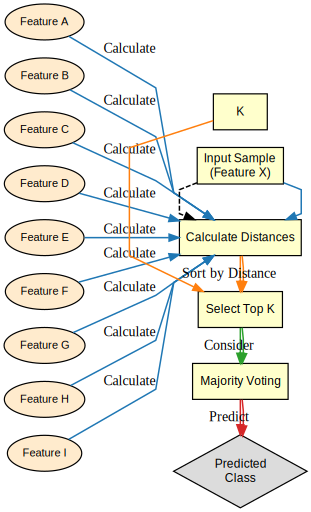

In [1]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/machine-learning-architecture-diagrams/KNN.svg'
display(SVG(filename=svg_file))

<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px">
- Training Data: This cluster represents the training data set used in the KNN algorithm. Each node in the cluster (A, B, C, D, E, F, G, H, I) represents a feature of the data set. These features can be any characteristic of a data point.<br>
- Input Sample (Function X): The node in this box represents the input sample whose class we want to predict. This corresponds to the values ​​of the new data points we want to classify. <br>
- Calculate Distance: This box node calculates the distance between the input samples and each training instance. The distance is calculated from input samples and feature values ​​for training instances. <br>
- K: This box-shaped node represents the value of K, which determines the number of nearest neighbors taken for classification.<br>
- Select Top K: This box node selects the top K instances with the smallest distance to the input samples. It sorts the distances and selects K nearest neighbors.<br>
- Majority voting: This box node performs majority voting among K nearest neighbors to determine the expected class of the input sample. It assigns the most frequent class among K's neighbors.<br>
- Prediction: This cluster represents the category output predicted by the KNN algorithm. <br>
- Predicted Class: This node represents the expected class of the input sample. This corresponds to the class marks assigned to the input samples based on a majority voting process. <br></div>


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Installing RapidsML cuDF    </div>

In [2]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade wheel

# Add the rapidsai conda channel
!conda config --prepend channels rapidsai

# Install RAPIDS packages
!conda install -y -c rapidsai -c nvidia -c conda-forge cudf cuml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-api 1.17.0 requires importlib-metadata~=6.0.0, but you have importlib-metadata 5.2.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
Retrieving notices: ...working... done

# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/opt/conda/lib/python3.10/site-packages/conda/gateways/repodata/__init__.py", line 161, in conda_http_errors
   


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
    </div>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import cudf
import cupy as cp
import numpy as np
from sklearn.model_selection import train_test_split
from cuml.neighbors import KNeighborsClassifier
from cuml.preprocessing import StandardScaler
from cuml.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Reading dataframes    </div>

In [4]:
train_df = cudf.read_csv('/kaggle/input/forest-cover-type-prediction/train.csv')
test_df = cudf.read_csv('/kaggle/input/forest-cover-type-prediction/test.csv')



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Fetching features and targets    </div>

In [5]:
X = train_df.drop(['Id', 'Cover_Type'], axis=1)
y = train_df['Cover_Type']



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Getting preliminary insight into the train dataframe    </div>

In [6]:
train_df.describe().to_pandas()


/opt/conda/lib/python3.10/site-packages/cudf/core/dataframe.py:4945: FutureWarning: `datetime_is_numeric` is deprecated. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/cudf/core/series.py:3133: FutureWarning: `datetime_is_numeric` is deprecated and will be removed in a future release. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Checking the class distribution    </div>

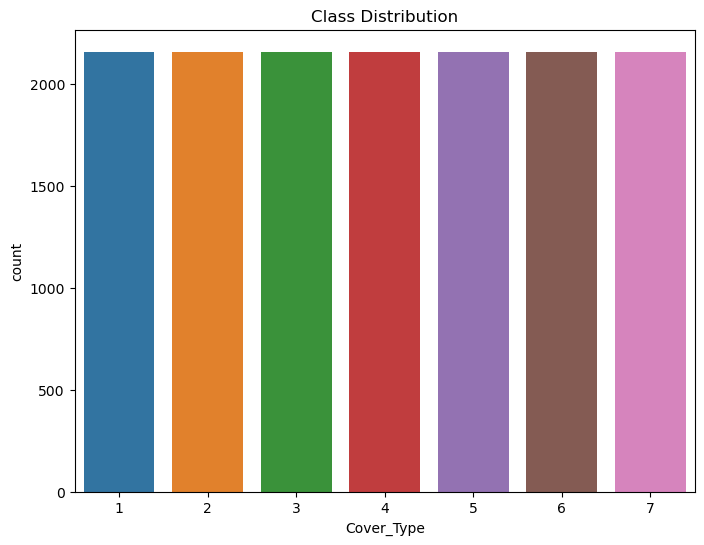

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=train_df.to_pandas())
plt.title('Class Distribution')
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Displaying the most significantly correlated features    </div>

/tmp/ipykernel_24/1699577218.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correlation_matrix_pruned = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
/tmp/ipykernel_24/1699577218.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  correlation_matrix_pruned = correlation_matrix[unique_features].loc[unique_features]
/tmp/ipykernel_24/1699577218.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  correlation_matrix_pruned = correlation_matrix[unique_features].loc[unique_features

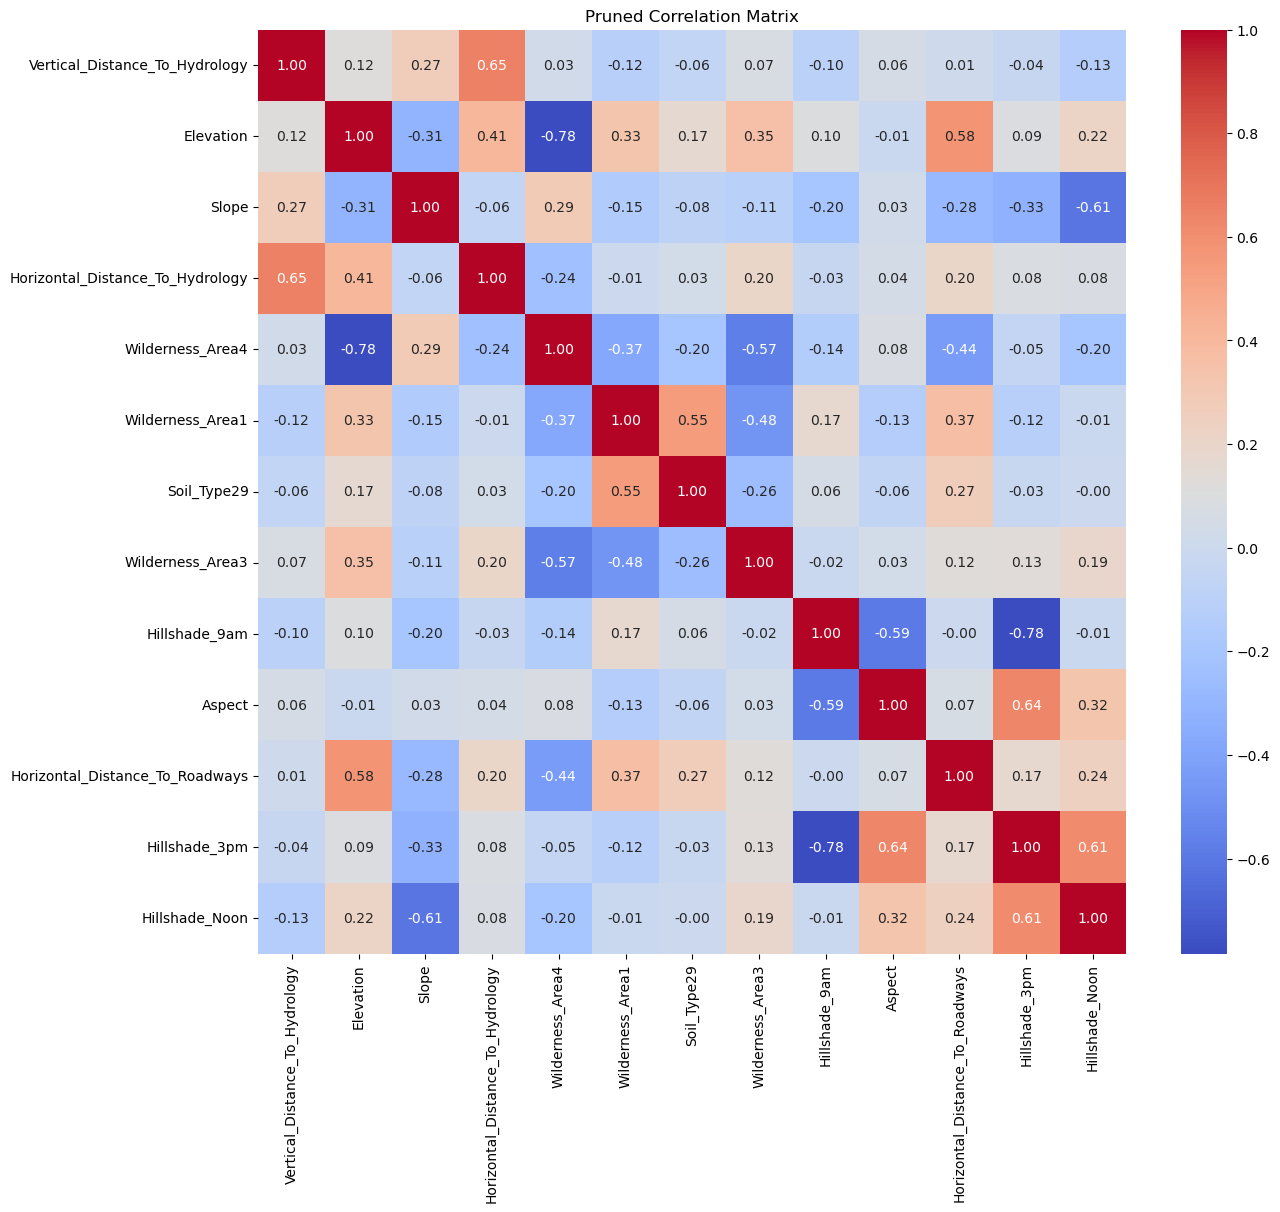

In [8]:
# Calculate correlation matrix
correlation_matrix = train_df.to_pandas().drop(['Id'], axis=1).corr()

# Set a correlation threshold to prune the matrix
threshold = 0.5
correlation_matrix_pruned = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find highly correlated features
highly_correlated_features = np.where(correlation_matrix_pruned > threshold)

# Get the unique features
unique_features = set()
for i, j in zip(highly_correlated_features[0], highly_correlated_features[1]):
    unique_features.add(correlation_matrix.columns[i])
    unique_features.add(correlation_matrix.columns[j])

# Create a pruned correlation matrix with highly correlated features
correlation_matrix_pruned = correlation_matrix[unique_features].loc[unique_features]

# Increase the figure size
plt.figure(figsize=(14, 12))

# Plot the pruned correlation matrix
sns.heatmap(correlation_matrix_pruned, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Pruned Correlation Matrix')

plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Numerical features analysis    </div>

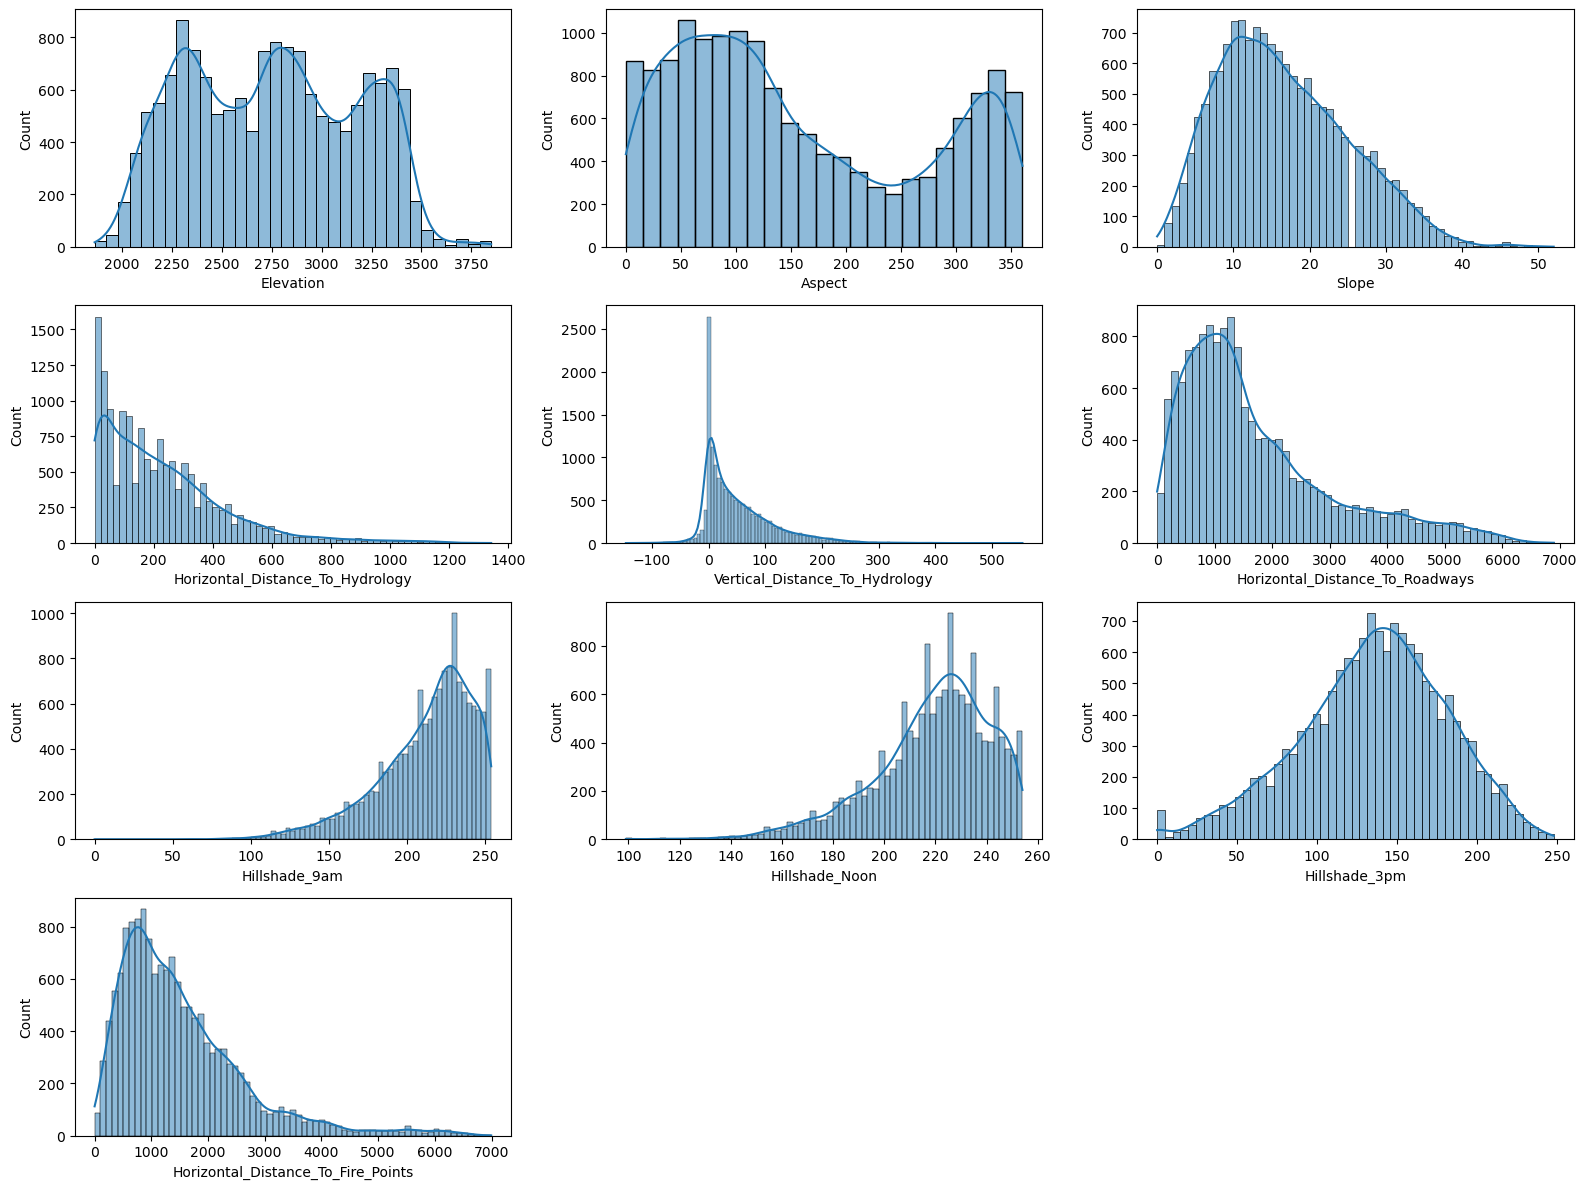

In [9]:
numeric_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(train_df.to_pandas()[feature], kde=True)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Categorical features analysis    </div>

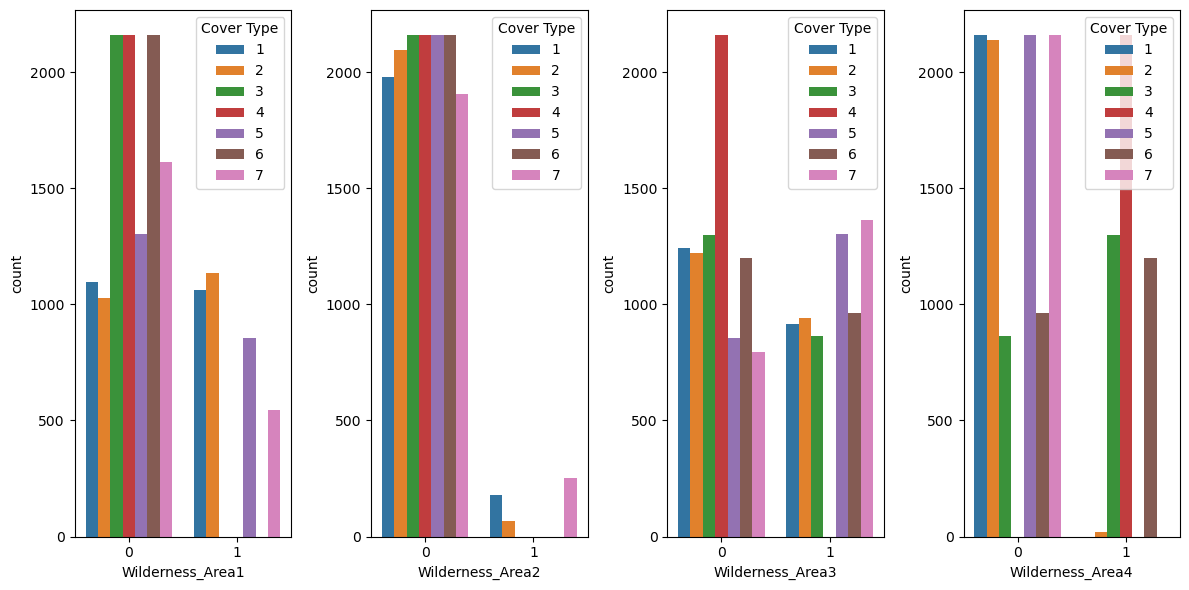

In [10]:
categorical_features = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    sns.countplot(x=feature, hue='Cover_Type', data=train_df.to_pandas())
    plt.xlabel(feature)
    plt.legend(title='Cover Type')
plt.tight_layout()
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Data Preprocessing    </div>

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).astype(np.float32)
test_features_scaled = scaler.transform(test_df.drop('Id', axis=1)).astype(np.float32)



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Splitting the data into train and val sets    </div>

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Finding the optimal K using the elbow method    </div>

In [13]:
k_values = range(1, 21)
accuracy_scores = []



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Fitting the KNN over each K and calculating their accuracy   </div>

In [14]:
for k in k_values:
    # Train the KNN classifier with current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions on the validation set
    val_predictions = knn.predict(X_val)

    # Calculate accuracy on the validation set
    accuracy = accuracy_score(cp.asarray(y_val), cp.asarray(val_predictions))
    accuracy_scores.append(accuracy)



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Plotting accuracy scores for various values of K   </div>

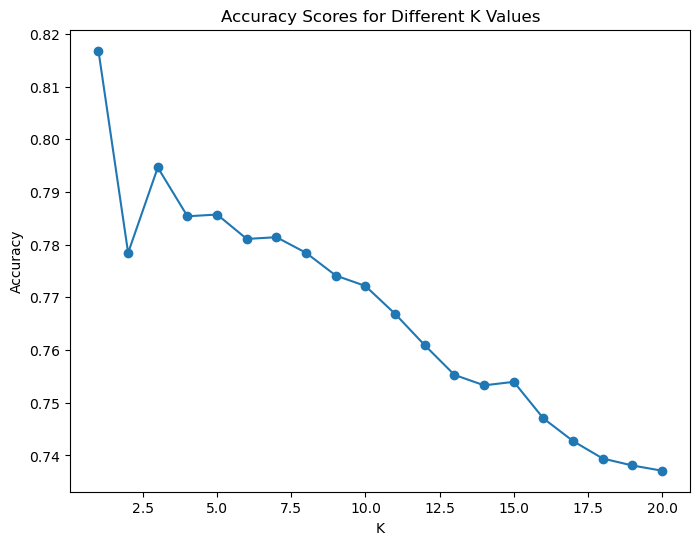

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy Scores for Different K Values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Finding the optimal K using the elbow method    </div>

In [16]:
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal K: {optimal_k}")


Optimal K: 1



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Feature importances    </div>

In [17]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X.to_numpy(), y.to_numpy())

RandomForestClassifier(random_state=42)

In [18]:
# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X.columns[sorted_indices]

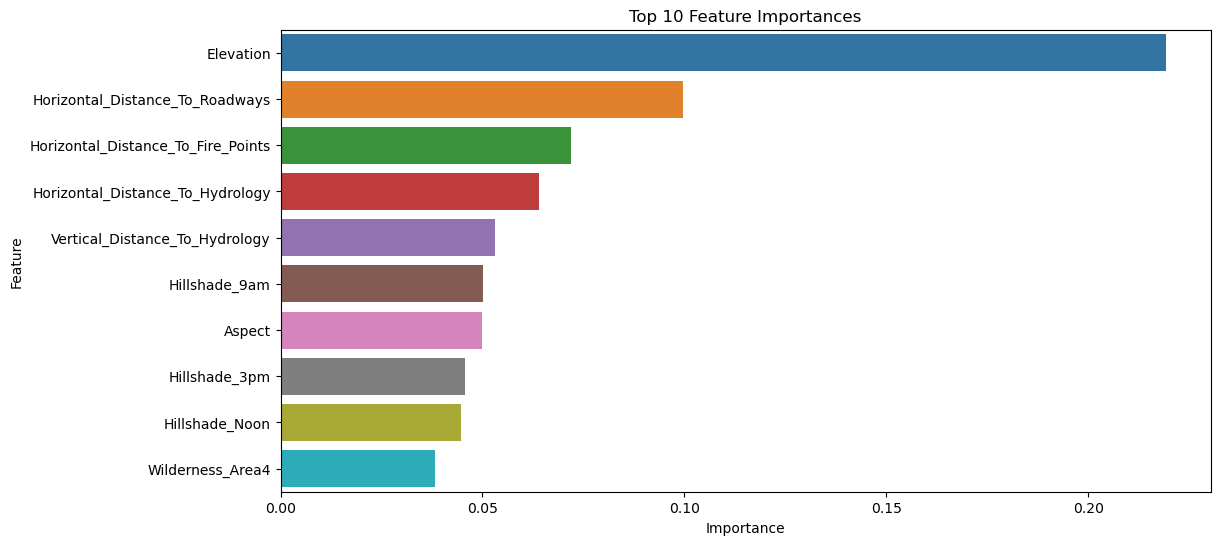

In [19]:
# Number of top features to display
top_n = 10

# Get top feature importances and corresponding feature names
top_importances = importances[sorted_indices][:top_n]
top_features = sorted_features[:top_n]

# Plot top feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Generating submission by fitting KNN on the best value of K   </div>

In [20]:
# Train the final KNN classifier with the optimal K value
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_scaled, y)


KNeighborsClassifier()

In [21]:
# Make predictions on the test set
test_predictions = knn.predict(test_features_scaled)

In [22]:
# Create submission file
submission_df = cudf.DataFrame({'Id': test_df['Id'], 'Cover_Type': test_predictions})
submission_df.to_pandas().to_csv('submission.csv', index=False)

In [23]:
submission_df

,Id,Cover_Type
0,15121,2
1,15122,1
2,15123,1
3,15124,1
4,15125,1
...,...,...
565887,581008,3
565888,581009,3
565889,581010,3
565890,581011,5



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Please Note that this notebook is aligned to illustrate the working of KNNs and hence other tree based approaches maybe better for the competition purposes.
</div>